# Pràctica 2

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv', header=0, delimiter=',')
test_df =  pd.read_csv('test.csv', header=0, delimiter=',')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Característiques de les dades:
Les característiques de les dades de test i de train son iguals, execeptuant per la columna Survived ja que es la variable objectiu. Tenim entre el test i el train un total de 1309 files i 12 columnes diferents

### Descripció:

```PassengerID```: es la única variable que no té cap tipus d'efecte amb la variable objectiu

```Survived``` : és la variable objectiu, pot ser (0 o 1):
- 1 = Survived
- 0 = Not Survived

```Pclass```: (Passenger Class) és l'estatus socioeconòmic del passatger i és una característica ordinal categòrica que té 3 valors únics (1, 2 o 3):
- 1 = Upper Class
- 2 = Middle Class
- 3 = Lower Class

```Name```, ``` Sex``` and ```Age```: s'explica per si mateix

```SibSp```: és el nombre total de germans i cònjuge dels passatgers

```Parch```: és el nombre total de pares i fills dels passatgers

```Ticket```: és el número de bitllet del passatger

```Fare```: és la tarifa del passatger

```Cabin```: és el número de cabina del passatger

```Embarked```:  és el port d'embarcament i és una característica categòrica que té 3 valors únics (C, Q o S):
- C = Cherbourg
- Q = Queenstown
- S = Southampton


### Tipus:
Categorical:
- Pclass (ordinal)
- Name (nominal)
- Sex (nominal)

Numerical:
- Age (continua)
- Fare (continua)
- SibSp (discreta)
- Parch (discreta)

Mixed:
- Ticket (numèrica i alfanumèrica)
- Cabin (alfanumèrica)

### Anàlisi de nulls

In [3]:
print("Dades Train")
print(train_df.info())

print("\nDades Test")
print(test_df.info())

Dades Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dades Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

Del Train Data tenim:

- Age: 177 de 891 valors nuls (19.8% de nuls).
- Cabin: 687 de 891 nuls (77.1% de nuls).
- Embarked: 2 de 891 nuls.


Del Test Data tenim:

- Age: 86 de 418 nuls (20.5% de nuls).
- Cabin: 327 de 418 nuls (78.2% de nuls).
- Fare: 1 de 418 nuls.

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


D'aqui podrem observar que:

- La taxa de supervivencia es del 38.3%
- Més del 75% dels passatgers estan per sobre dels 38 anys
- Hi ha molta gent gran
- Molts passatgers viatjen sols
- Tenim outliers a la caracteristica Fare

## Ànalisi descriptiu


### Variable objectiu:
La nostra variable objectiu es "Survived", podem veure que està composta per dues classes, es binaria. Tenim llavors que si un passager va sobreviure al accident del titanic la classe es 1 i si va morir, es a dir no va sobreviure, la classe es 0

Podem apreciar també en aquest gràfic que les proporcions de gent que va sobreviure i la que va morir no estan repartides de manera equitativa. Això té sentit perquè partim que va ser un accident i que per tant la quantitat de gent morta o viva no ha de seguir una repartició de cincuanta cincuanta. Igualment si que podem veure que aproximadament dos terços de la gent va morir i el terç restant va sobreviure a l'enfosament. El més probable despres quan realitzem proves amb el test sigui que la majoria d'etiquetes assignades siguin zeros perquè es el dominant al train.

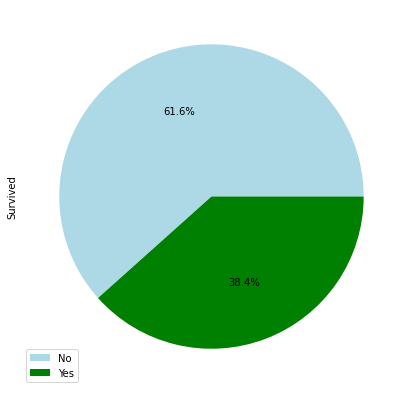

In [5]:
train_df.Survived.value_counts().plot.pie(colors = ['lightblue','Green'],
                                          legend='True',labeldistance=None,
                                         labels=['No','Yes'],
                                         figsize=(7,7),autopct='%1.1f%%')

Mirem supervivents primer per sexe, on tenim q dones i homes. Podem veure que la taxa de dones supervivents és de 74,2% i de homes de 18,8%.

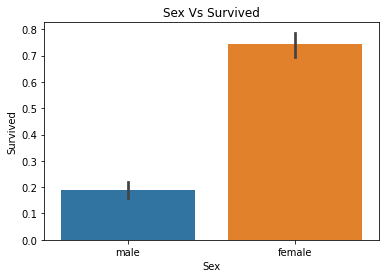

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
sns.barplot(data = train_df , x = 'Sex' , y = "Survived").set_title(f"{'Sex'} Vs Survived")
plt.show()
train_df[['Sex', "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)

In [7]:
plt.figure(figsize = (15,7))
sns.histplot(data = train_df , x = 'Sex',
             hue = "Survived",binwidth=5,palette = sns.color_palette(["#ffc75e","#ffa600"])
             ,multiple = "stack").set_title(f"{'Sex'} Vs Survived")
plt.legend(['Yes','No'])
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 1080x504 with 0 Axes>

També mirem la supervivència segons la classe on es trobaven, i veiem que la gent que viatjava en primera classe un 69% d'aquesta va sobreviure, si viatjaven a segona classe van sobrevirue un 47% i de tercera classe un 24%

In [ ]:
sns.barplot(data = train_df , x = 'Pclass' , y = "Survived").set_title(f"{'Pclass'} Vs Survived")
plt.show()
train_df[['Pclass', "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)

Podem veure també les proporcions de les classes dels passatgers al titanic. Observem que més de la meitat dels passatgers eren a la tercera classe i que les proporcions de la primera i segona classe es més o menys similar

In [ ]:
train_df.Pclass.value_counts().plot.pie(legend='True',labeldistance=None,
                                         figsize=(7,7),autopct='%1.1f%%',
                                       colors=["#5f9e6e","#5975a4","#cc8963"])

Mirem els supervivents per edat i sexe per veure si hi ha cap mena de relació

In [ ]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
train_df['Age'].hist(bins=30,color='#285cb0',alpha=0.8,figsize=(15,7))

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(data = train_df, x = 'Age',
             hue = "Survived",binwidth=5,palette = sns.color_palette(['#6883ad','#285cb0'])
             ,multiple = "stack" ).set_title(f"{'Age'} Vs Survived")
plt.legend(['Yes','No'])
plt.show()

També mirarem si el que van pagar pel bitllet la gent que estava al titanic te relació amb la seva supervivencia

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(data = train_df, x = 'Fare',
             hue = "Survived",binwidth=5,palette = sns.color_palette(['#dea4d5','#b85aaa'])
             ,multiple = "stack" ).set_title(f"{'Fare'} Vs Survived")
plt.legend(['Yes','No'])
plt.show()

A simple vista despres de mirar aquest gràfics podem extreure una mica d'informació:

* En proporció van sobreviure més dones que homes a l'enfonsament.


* De la PClass 1 comparat amb les altres dues classes va sobreviure un percentatge major de gent a l'accident.


* Segons l'edat dels passatgers veiem que la propocio de nadons, entre zero i cinc anys, i de joves d'entre quinze i vint,  va sobreviure una major proporció que la resta d'edats. Mentre que de la resta veiem la tendencia observada a la gràfica circular, aproximadament un terç sobreviu i la resta mor.


* En relació a la variable Fare veiem que molts dels passatgers que van gastar més en el bitllet van sorbeviure en major proporcio que els que van comprar els més econòmics, la diferencia es notable com podem apreciar a la gràfica i es poden apreciar outliers com ja s'ha comentat al inici.

### Correlació de les dades

In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_df.corr(), annot = True, fmt='.2g')

El que ens interessa es la correlació de les dades amb la variable objectiu "Survived". Com podem veure la correlació és negativa amb les variables PClass, Age, SibSp, també amb PassangerID pero la correlació es molt pròxima a 0. Les variables Parch i Fare tenen correlació positiva tot i que la de Parch també es molt pròxima a 0.

### Fem fora les variables no necesaries

In [21]:
train_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,male,22.0,1,0,7.2500,S,2,0,1.0
1,1,1,female,38.0,1,0,71.2833,C,2,0,3.0
2,1,3,female,26.0,0,0,7.9250,S,1,1,2.0
3,1,1,female,35.0,1,0,53.1000,S,2,0,3.0
4,0,3,male,35.0,0,0,8.0500,S,1,1,1.0


In [22]:
test_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,3,male,34.5,0,0,7.8292,Q,1,1,1.0
1,3,female,47.0,1,0,7.0000,S,2,0,3.0
2,2,male,62.0,0,0,9.6875,Q,1,1,1.0
3,3,male,27.0,0,0,8.6625,S,1,1,1.0
4,3,female,22.0,1,1,12.2875,S,3,0,3.0


### Transorfmem les variables categoriques Sex i Embarked

In [23]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)   

In [24]:
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)   

In [25]:
train_df.Embarked.fillna(train_df.Embarked.dropna().max(), inplace=True)
train_df['Embarked'] = train_df['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

In [26]:
test_df.Embarked.fillna(train_df.Embarked.dropna().max(), inplace=True)
test_df['Embarked'] = test_df['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

### Tractament de nuls
Hem de realitzar un tractament de nul·ls per tenir les columnes amb totes les variables necessaries, per aixo omplirem la columna d'edat segons la classe on estan situats

In [27]:
f_class_Age=train_df.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

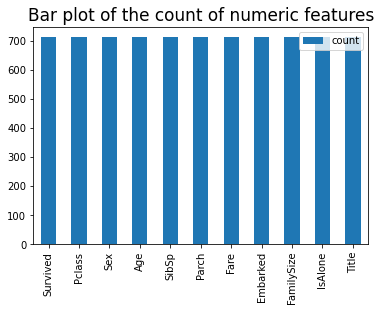

In [28]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)
d=train_df.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [29]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.dropna(inplace=True)
train_df.head()

KeyError: "['Cabin'] not found in axis"

In [30]:
test_df.drop('Cabin',axis=1,inplace=True)
test_df.dropna(inplace=True)
test_df.head()

KeyError: "['Cabin'] not found in axis"

Fem un clean de les dades

In [10]:
data_cleaner = [train_df, test_df]

In [11]:
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr


In [13]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data_cleaner:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [14]:
train_df.drop(['Name'], axis=1 , inplace = True)
test_df.drop(['Name'], axis=1 , inplace = True)    

In [31]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,0,2,0,1.0
1,1,1,1,38.0,1,0,71.2833,1,2,0,3.0
2,1,3,1,26.0,0,0,7.9250,0,1,1,2.0
3,1,1,1,35.0,1,0,53.1000,0,2,0,3.0
4,0,3,0,35.0,0,0,8.0500,0,1,1,1.0


Comprovem que ja no tenim valors nuls al dataset

In [32]:
print(train_df.isnull().sum())
print("-" * 20)
print(test_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64
--------------------
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64


## Apartat A

In [33]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier

In [34]:
x_train = StandardScaler().fit_transform(train_df.drop(columns=['Survived']))
y_train = train_df['Survived'].values
#x_test = StandardScaler()
print('X_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
#print('X_test shape: {}'.format(x_test.shape))

X_train shape: (712, 10)
y_train shape: (712,)


In [41]:
kfold = StratifiedKFold(n_splits=10)

In [58]:
random_state = 2
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state, probability = True),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             GradientBoostingClassifier(random_state = random_state),
             ]

In [59]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1, 1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,3,5,12,30]}

gbc_param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10]
    }

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   gbc_param_grid]

In [64]:
cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = random_state)

In [66]:
for i in range(len(classifier)):
    print("---------------------------------------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(X_train,Y_train)
    
    cv_result.append(clf.best_score_)
    
    MSE = mean_squared_error(Y_test,clf.predict(X_test))
    mean_squared_errors.append(MSE)
    print("Valors que afegim MSE", MSE)
    
    #roc_auc_scores.append(roc_auc_score(Y_test, clf.predict_proba(X_test), multi_class='ovr'))
    RECALL = recall_score(Y_test, clf.predict(X_test), average='weighted')
    recall_scores.append(RECALL)
    print("Valors que afegim Recall", RECALL)
    
    PRECISION = precision_score(Y_test, clf.predict(X_test), average='weighted')
    precision_scores.append(PRECISION)
    print("Valors que afegim precision", PRECISION)
    
    F1 = f1_score(Y_test, clf.predict(X_test), average='weighted')
    f1_scores.append(F1)
    print("Valors que afegim f1", F1)
    
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    
    #print("ROC AUC: {}".format(roc_auc_scores[i]))
   
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1779 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 2485 out of 2500 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Valors que afegim MSE 0.25874125874125875
Valors que afegim Recall 0.7412587412587412
Valors que afegim precision 0.7499587577556389
Valors que afegim f1 0.7438376015035053
Model: DecisionTreeClassifier(random_state=2)
Accuracy: %82.43
MSE: 0.25874125874125875
Recall: 0.7412587412587412
Precision: 0.7499587577556389
F1-Score: 0.7438376015035053
Best Estimator: DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=2)
---------------------------------------------------------------------------
Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Valors que afegim MSE 0.23776223776223776
Valors que afegim Recall 0.7622377622377622
Valors que afegim precision 0.7641611262300918
Valors que afegim f1 0.7630483153210426
Model: SVC(probability=True, random_state=2)
Accuracy: %84.88
MSE: 0.23776223776223776
Recall: 0.7622377622377622
Precision: 0.7641611262300918
F1-Score: 0.7630483153210426
Best Estimator: SVC(C=10, gamma=0.01, probability=True, random_state=2)
---------------------------------------------------------------------------
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.1min finished


Valors que afegim MSE 0.27972027972027974
Valors que afegim Recall 0.7202797202797203
Valors que afegim precision 0.7277698205409048
Valors que afegim f1 0.7227619381842147
Model: RandomForestClassifier(random_state=2)
Accuracy: %84.36
MSE: 0.27972027972027974
Recall: 0.7202797202797203
Precision: 0.7277698205409048
F1-Score: 0.7227619381842147
Best Estimator: RandomForestClassifier(bootstrap=False, max_features=1, min_samples_split=10,
                       n_estimators=300, random_state=2)
---------------------------------------------------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Valors que afegim MSE 0.2517482517482518
Valors que afegim Recall 0.7482517482517482
Valors que afegim precision 0.7502641037123796
Valors que afegim f1 0.7491099809281627
Model: LogisticRegression(random_state=2)
Accuracy: %83.65
MSE: 0.2517482517482518
Recall: 0.7482517482517482
Precision: 0.7502641037123796
F1-Score: 0.7491099809281627
Best Estimator: LogisticRegression(C=0.03359818286283781, random_state=2)
---------------------------------------------------------------------------
Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 3585 out of 3600 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Valors que afegim MSE 0.2517482517482518
Valors que afegim Recall 0.7482517482517482
Valors que afegim precision 0.7444147957305852
Valors que afegim f1 0.7449519789673241
Model: KNeighborsClassifier()
Accuracy: %85.76
MSE: 0.2517482517482518
Recall: 0.7482517482517482
Precision: 0.7444147957305852
F1-Score: 0.7449519789673241
Best Estimator: KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=8)
---------------------------------------------------------------------------
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   10.1s finished


Valors que afegim MSE 0.24475524475524477
Valors que afegim Recall 0.7552447552447552
Valors que afegim precision 0.7608535532264346
Valors que afegim f1 0.7571227687857695
Model: GradientBoostingClassifier(random_state=2)
Accuracy: %84.18
MSE: 0.24475524475524477
Recall: 0.7552447552447552
Precision: 0.7608535532264346
F1-Score: 0.7571227687857695
Best Estimator: GradientBoostingClassifier(learning_rate=0.2, min_samples_split=10,
                           random_state=2)
---------------------------------------------------------------------------


In [67]:
print(len(cv_result))
print(len(mean_squared_errors))
print(len(recall_scores))
print(len(precision_scores))
print(len(cv_result))
print(len(f1_scores))

6
6
6
6
6
6


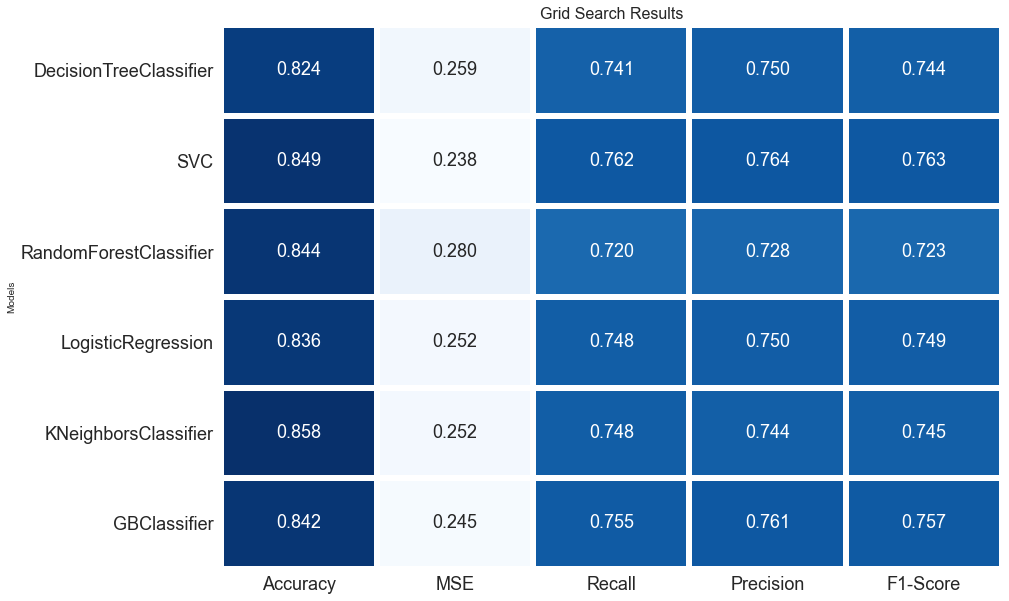

In [68]:
sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Accuracy":cv_result,
                           "MSE":mean_squared_errors,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models":["DecisionTreeClassifier", 
                                     "SVC",
                                     "RandomForestClassifier",
                                     "LogisticRegression",
                                     "KNeighborsClassifier",
                                     "GBClassifier",
                                     
                                     ]})

cv_results.index = cv_results["Models"]

cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(14,10))

sns.heatmap(cv_results, annot=True,cmap = "Blues",fmt= '.3f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 18})

plt.xticks(size = 18)
plt.yticks(size = 18, rotation = 0)
plt.ylabel("Models")
plt.title("Grid Search Results", size = 16)
plt.show()

In [69]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

ValueError: Found input variables with inconsistent numbers of samples: [569, 712]